<a href="https://colab.research.google.com/github/MiguelLuan/TelecomX_BR_parte2_Prediction/blob/main/TelecomX_BR_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.dummy import DummyClassifier
#from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2


##📌 Extração (coleta)

In [145]:
caminho = str(Path.cwd()) + '/TelecomX_Processado.csv'

In [146]:
caminho

'/content/TelecomX_Processado.csv'

In [147]:
df = pd.read_csv(caminho)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [149]:
for c in df.columns:
  print(f'Valores da coluna {c}: ',df[c].unique())

Valores da coluna customerID:  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Valores da coluna Churn:  ['No' 'Yes']
Valores da coluna gender:  ['Female' 'Male']
Valores da coluna SeniorCitizen:  ['No' 'Yes']
Valores da coluna Partner:  ['Yes' 'No']
Valores da coluna Dependents:  ['Yes' 'No']
Valores da coluna tenure:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Valores da coluna PhoneService:  ['Yes' 'No']
Valores da coluna MultipleLines:  ['No' 'Yes' 'No phone service']
Valores da coluna InternetService:  ['DSL' 'Fiber optic' 'No']
Valores da coluna OnlineSecurity:  ['No' 'Yes' 'No internet service']
Valores da coluna OnlineBackup:  ['Yes' 'No' 'No internet service']
Valores da coluna DeviceProtection:  ['No' 'Yes' 'No internet service']
Valores da coluna TechSupport:  ['Ye

##🛠️ Pre processamento

✔️ Remover colunas irrelevantes


In [150]:
df.drop('customerID',axis=1,inplace=True )

In [151]:
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges_Monthly', 'Charges_Total', 'daily_accounts', 'qtd_servicos',
       'Churn_num'],
      dtype='object')

✔️ Agrupamentode **No** y **No service**

In [152]:
df.replace({
    'No phone service':'No',
    'No internet service':'No'
},inplace=True)

In [153]:
for c in df.columns:
  print(f'Valores da coluna {c}: ',df[c].unique())

Valores da coluna Churn:  ['No' 'Yes']
Valores da coluna gender:  ['Female' 'Male']
Valores da coluna SeniorCitizen:  ['No' 'Yes']
Valores da coluna Partner:  ['Yes' 'No']
Valores da coluna Dependents:  ['Yes' 'No']
Valores da coluna tenure:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Valores da coluna PhoneService:  ['Yes' 'No']
Valores da coluna MultipleLines:  ['No' 'Yes']
Valores da coluna InternetService:  ['DSL' 'Fiber optic' 'No']
Valores da coluna OnlineSecurity:  ['No' 'Yes']
Valores da coluna OnlineBackup:  ['Yes' 'No']
Valores da coluna DeviceProtection:  ['No' 'Yes']
Valores da coluna TechSupport:  ['Yes' 'No']
Valores da coluna StreamingTV:  ['Yes' 'No']
Valores da coluna StreamingMovies:  ['No' 'Yes']
Valores da coluna Contract:  ['One year' 'Month-to-month' 'Two year']
Valores da coluna PaperlessB

✔️ Verificação novamente de valore nulos

In [154]:
df.isnull().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## 📊 EDA

✔️ Correlação entre variaveis numericas


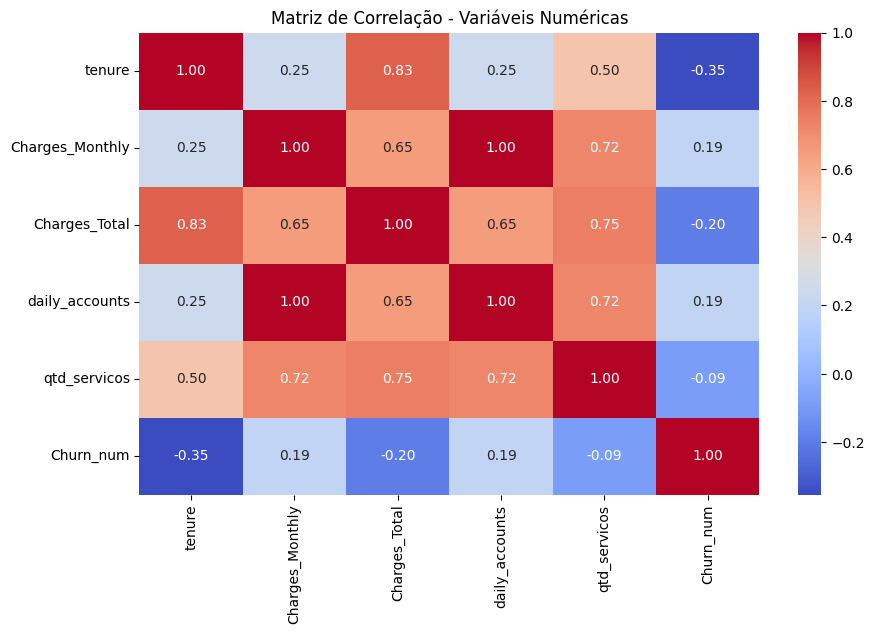

In [155]:
df_numeric = df.select_dtypes(include=['int64','float64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

✔️ Remover colunas irrelevantes


In [156]:
df.drop(columns=['Charges_Total','daily_accounts'],axis=1,inplace=True)

In [157]:
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges_Monthly', 'qtd_servicos', 'Churn_num'],
      dtype='object')

2️⃣ Análise de churn por categoria (variáveis categóricas)

🔹 Selecionar variáveis categóricas

In [158]:
df.drop('Churn',axis=1,inplace=True)

In [159]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges_Monthly', 'qtd_servicos', 'Churn_num'],
      dtype='object')

In [160]:
df_rank = df.copy()

categorical_cols = df_rank.select_dtypes(include=['object']).columns

label = LabelEncoder()

for col in categorical_cols:
  df_rank[col] = label.fit_transform(df_rank[col])

x_cat = df_rank[categorical_cols]
y = df_rank['Churn_num']

chi_scores, p_values = chi2(x_cat,y)

chi_df = pd.DataFrame({
    'Variável': categorical_cols,
    'Chi2 Score': chi_scores,
    'p_value': p_values
})

chi_df = chi_df.sort_values(by='Chi2 Score',ascending=False)

chi_df

,Variável,Chi2 Score,p_value
13,Contract,1111.759054,9.186154e-244
7,OnlineSecurity,147.165601,7.219883e-34
10,TechSupport,135.439602,2.645952e-31
1,SeniorCitizen,133.482766,7.089546e-31
3,Dependents,131.271509,2.159540e-30
14,PaperlessBilling,104.979224,1.234232e-24
2,Partner,81.857769,1.462409e-19
15,PaymentMethod,59.240507,1.395318e-14
8,OnlineBackup,31.209832,2.315902e-08
9,DeviceProtection,20.216007,6.917171e-06


✔️ Remover colunas irrelevantes


In [161]:
df.drop(columns=chi_df['Variável'].values.tolist()[10:],axis=1,inplace=True)

In [162]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'qtd_servicos',
       'Churn_num'],
      dtype='object')

In [163]:
for c in df.columns:
  print(f'Valores da coluna {c}: ',df[c].unique())

Valores da coluna SeniorCitizen:  ['No' 'Yes']
Valores da coluna Partner:  ['Yes' 'No']
Valores da coluna Dependents:  ['Yes' 'No']
Valores da coluna tenure:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Valores da coluna OnlineSecurity:  ['No' 'Yes']
Valores da coluna OnlineBackup:  ['Yes' 'No']
Valores da coluna DeviceProtection:  ['No' 'Yes']
Valores da coluna TechSupport:  ['Yes' 'No']
Valores da coluna Contract:  ['One year' 'Month-to-month' 'Two year']
Valores da coluna PaperlessBilling:  ['Yes' 'No']
Valores da coluna PaymentMethod:  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Valores da coluna Charges_Monthly:  [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Valores da coluna qtd_servicos:  [3 1 4 2 6 0 5]
Valores da coluna Churn_num:  [0 1]


In [164]:
binary_cols = [
    'SeniorCitizen', 'Partner', 'Dependents',
    'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'PaperlessBilling'
]

for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})


In [165]:
for c in df.columns:
  print(f'Valores da coluna {c}: ',df[c].unique())

Valores da coluna SeniorCitizen:  [0 1]
Valores da coluna Partner:  [1 0]
Valores da coluna Dependents:  [1 0]
Valores da coluna tenure:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Valores da coluna OnlineSecurity:  [0 1]
Valores da coluna OnlineBackup:  [1 0]
Valores da coluna DeviceProtection:  [0 1]
Valores da coluna TechSupport:  [1 0]
Valores da coluna Contract:  ['One year' 'Month-to-month' 'Two year']
Valores da coluna PaperlessBilling:  [1 0]
Valores da coluna PaymentMethod:  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Valores da coluna Charges_Monthly:  [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Valores da coluna qtd_servicos:  [3 1 4 2 6 0 5]
Valores da coluna Churn_num:  [0 1]


In [166]:
df = pd.get_dummies(df,columns=['Contract','PaymentMethod'],drop_first=True).astype(int)

In [167]:
df

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,Charges_Monthly,qtd_servicos,Churn_num,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,9,0,1,0,1,1,65,3,0,1,0,0,0,1
1,0,0,0,9,0,0,0,0,0,59,1,0,0,0,0,0,1
2,0,0,0,4,0,0,1,0,1,73,1,1,0,0,0,1,0
3,1,1,0,13,0,1,1,0,1,98,4,1,0,0,0,1,0
4,1,1,0,3,0,0,0,1,1,83,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,13,1,0,0,1,0,55,2,0,1,0,0,0,1
7028,0,1,0,22,0,0,0,0,1,85,1,1,0,0,0,1,0
7029,0,0,0,2,0,1,0,0,1,50,1,0,0,0,0,0,1
7030,0,1,1,67,1,0,1,1,0,67,4,0,0,1,0,0,1


In [168]:
corr = df.corr(numeric_only=True)

In [169]:
corr['Churn_num'].sort_values(ascending=False)

,Churn_num
Churn_num,1.000000
PaymentMethod_Electronic check,0.301455
Charges_Monthly,0.192922
PaperlessBilling,0.191454
SeniorCitizen,0.150541
DeviceProtection,-0.066193
OnlineBackup,-0.082307
qtd_servicos,-0.087882
PaymentMethod_Mailed check,-0.090773
PaymentMethod_Credit card (automatic),-0.134687


In [170]:
corr['SeniorCitizen'].sort_values(ascending=False)

,SeniorCitizen
SeniorCitizen,1.000000
Charges_Monthly,0.219829
PaymentMethod_Electronic check,0.171322
PaperlessBilling,0.156258
Churn_num,0.150541
qtd_servicos,0.067527
OnlineBackup,0.066663
DeviceProtection,0.059514
Partner,0.016957
tenure,0.015683


In [171]:
x = df.drop('Churn_num',axis=1)
y = df['Churn_num']

In [172]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [173]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)

dummy.score(x_test,y_test)

0.7364928909952607

In [174]:
modelo1 = LogisticRegression(max_iter=1000)

In [175]:
modelo1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [176]:
y_predict = modelo1.predict(x_test)

In [177]:
conf = confusion_matrix(y_test,y_predict)

In [178]:
conf

array([[1388,  166],
       [ 259,  297]])

In [179]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1554
           1       0.64      0.53      0.58       556

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [180]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [181]:
modelo2 = LogisticRegression(max_iter=1000)

In [182]:
modelo2.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [183]:
y_predict2 = modelo2.predict(x_test_scaled)

In [184]:
conf2 = confusion_matrix(y_test, y_predict2).tolist()


In [185]:
conf2

[[1386, 168], [261, 295]]

-> Matriz de confusão:

- Verdadeiro Negativo (TN) -> O modelo acertou 1375 clientes que não sairam
- Falso Positivo (FP) -> O modelo previu que saíram 179,embora estivesse errado
- Falso Negativo (FN) -> O modelo não detectou 242 clientes que saíram
- Verdadeiro Positivo (TP) -> O modelo acertou os 312 clientes que saíram


In [186]:
accu = accuracy_score(y_test,y_predict2)

In [187]:
print(f'Accuracy: Acertou {accu*100:.2f}% das previsões totais')

Accuracy: Acertou 79.67% das previsões totais


In [188]:
print('Recall: {:.2f}%'.format(
    conf2[1][1] / (conf2[1][1] + conf2[1][0]) * 100
))

Recall: 53.06%


In [189]:

print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1554
           1       0.64      0.53      0.58       556

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [190]:
modelo3 = LogisticRegression(class_weight='balanced',random_state=42)

In [191]:
modelo3.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [192]:
y_predict3 = modelo3.predict(x_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [193]:
conf3 = confusion_matrix(y_test, y_predict3)


In [194]:
conf3

array([[961, 593],
       [ 93, 463]])

In [195]:
accu3 = accuracy_score(y_test,y_predict3)

In [196]:
print(f'Accuracy: Acertou {accu3*100:.2f}% das previsões totais')

Accuracy: Acertou 67.49% das previsões totais


In [197]:
print('Recall: {:.2f}%'.format(
    conf3[1][1]/(conf3[1][1]+conf3[1][0]) * 100
))

Recall: 83.27%


In [198]:
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74      1554
           1       0.44      0.83      0.57       556

    accuracy                           0.67      2110
   macro avg       0.68      0.73      0.66      2110
weighted avg       0.79      0.67      0.69      2110



In [199]:
modelo3.score(x_train_scaled,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6859000406338887

In [200]:
modelo3.score(x_test_scaled,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6748815165876777

In [201]:
modelo2.score(x_train_scaled,y_train)

0.7978464039008533

In [202]:
modelo2.score(x_test_scaled,y_test)

0.7966824644549763

In [203]:
modelo1.score(x_train_scaled,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7576188541243397

In [204]:
modelo1.score(x_test_scaled,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7421800947867299

In [205]:
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo
# n_estimators=100 significa que ele vai criar 100 árvores diferentes
modelo_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Treinando (pode usar o x_train original ou o scaled, o resultado será quase igual)
modelo_rf.fit(x_train, y_train)

# Fazendo as previsões
y_predict_rf = modelo_rf.predict(x_test)

# Comparando os resultados
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1554
           1       0.58      0.50      0.54       556

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110



In [206]:
from sklearn.tree import DecisionTreeClassifier


In [207]:
arvore = DecisionTreeClassifier(random_state=42,class_weight='balanced')
arvore.fit(x_train,y_train)
y_predict_tree = arvore.predict(x_test)
print(classification_report(y_test,y_predict_tree))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1554
           1       0.48      0.49      0.49       556

    accuracy                           0.73      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.73      0.73      2110



In [208]:
arvore.score(x_train,y_train)

0.9831369362047948

In [209]:
arvore.score(x_test,y_test)

0.7255924170616114

In [210]:
arvore = DecisionTreeClassifier(max_depth=3,random_state=42,class_weight='balanced')
arvore.fit(x_train,y_train)
y_predict_tree = arvore.predict(x_test)
print(classification_report(y_test,y_predict_tree))

              precision    recall  f1-score   support

           0       0.92      0.55      0.69      1554
           1       0.41      0.87      0.56       556

    accuracy                           0.64      2110
   macro avg       0.67      0.71      0.63      2110
weighted avg       0.79      0.64      0.66      2110



In [211]:
arvore.score(x_train,y_train)

0.660503860219423

In [212]:
arvore.score(x_test,y_test)

0.638388625592417

In [213]:
arvore = DecisionTreeClassifier(max_depth=4,random_state=42,class_weight='balanced')
arvore.fit(x_train,y_train)
y_predict_tree = arvore.predict(x_test)
print(classification_report(y_test,y_predict_tree))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1554
           1       0.46      0.81      0.58       556

    accuracy                           0.70      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.79      0.70      0.71      2110



In [214]:
arvore.score(x_train,y_train)

0.7289719626168224

In [215]:
arvore.score(x_test,y_test)

0.695260663507109

In [216]:
from sklearn.tree import plot_tree

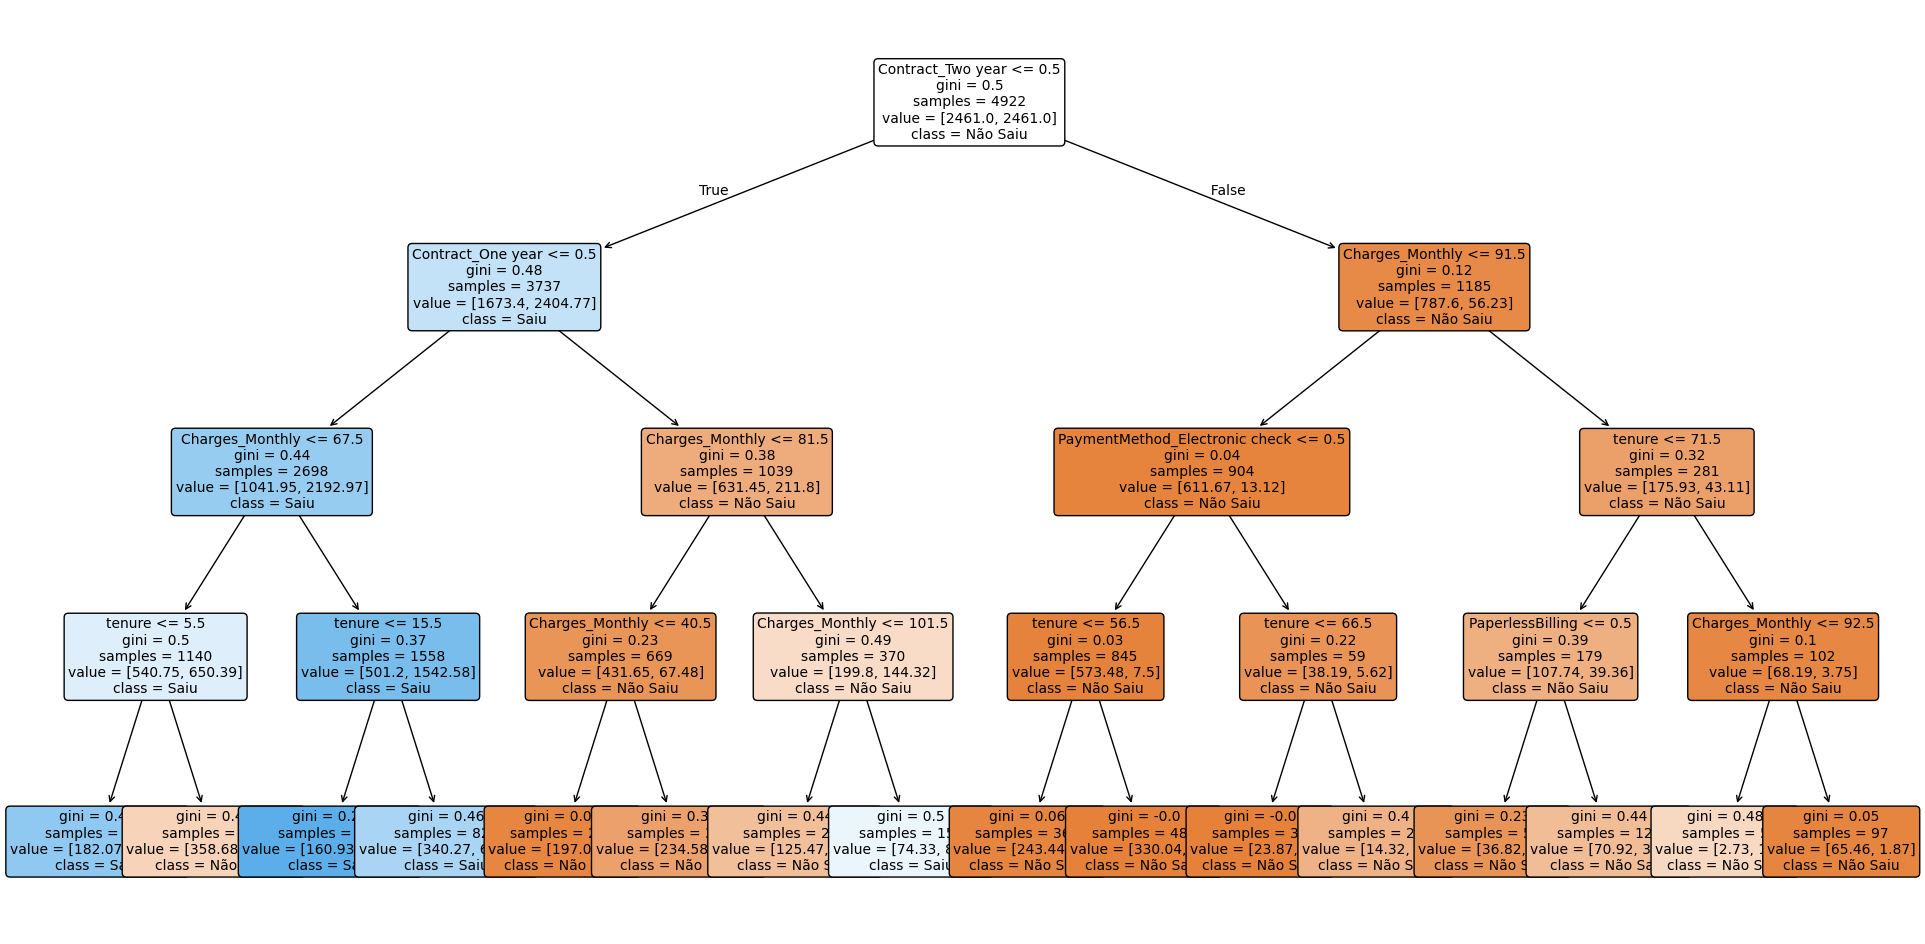

In [217]:
plt.figure(figsize=(24, 12)) # Aumente a proporção da figura
plot_tree(arvore,
          feature_names=x.columns,
          class_names=['Não Saiu', 'Saiu'],
          filled=True,
          rounded=True,
          fontsize=10, # Ajuste o tamanho da letra
          precision=2) # Limita as casas decimais nos nós
plt.show()

In [218]:
from sklearn.tree import export_text
regra_arvore = export_text(arvore, feature_names=list(x.columns))
print(regra_arvore)

|--- Contract_Two year <= 0.50
|   |--- Contract_One year <= 0.50
|   |   |--- Charges_Monthly <= 67.50
|   |   |   |--- tenure <= 5.50
|   |   |   |   |--- class: 1
|   |   |   |--- tenure >  5.50
|   |   |   |   |--- class: 0
|   |   |--- Charges_Monthly >  67.50
|   |   |   |--- tenure <= 15.50
|   |   |   |   |--- class: 1
|   |   |   |--- tenure >  15.50
|   |   |   |   |--- class: 1
|   |--- Contract_One year >  0.50
|   |   |--- Charges_Monthly <= 81.50
|   |   |   |--- Charges_Monthly <= 40.50
|   |   |   |   |--- class: 0
|   |   |   |--- Charges_Monthly >  40.50
|   |   |   |   |--- class: 0
|   |   |--- Charges_Monthly >  81.50
|   |   |   |--- Charges_Monthly <= 101.50
|   |   |   |   |--- class: 0
|   |   |   |--- Charges_Monthly >  101.50
|   |   |   |   |--- class: 1
|--- Contract_Two year >  0.50
|   |--- Charges_Monthly <= 91.50
|   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |--- tenure <= 56.50
|   |   |   |   |--- class: 0
|   |   |   |--- tenure >  

In [219]:
from sklearn.preprocessing import MinMaxScaler


In [220]:
normalizacao = MinMaxScaler()
x_train_normalizado = normalizacao.fit_transform(x_train)


In [221]:
from sklearn.neighbors import KNeighborsClassifier

In [222]:
kne = KNeighborsClassifier()

In [223]:
kne.fit(x_train_normalizado,y_train)


KNeighborsClassifier()

In [224]:
x_test_normalizado = normalizacao.transform(x_test)

In [225]:
kne.score(x_train_normalizado,y_train)

0.833604225924421

In [226]:
kne.score(x_test_normalizado,y_test)

0.7592417061611374

In [227]:
y_predict_kne = kne.predict(x_test_normalizado)

In [228]:
print(classification_report(y_test,y_predict_kne))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1554
           1       0.55      0.51      0.53       556

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.68      2110
weighted avg       0.75      0.76      0.76      2110

